# Basics of Python

In this first lesson, we will explore two basic data structures that are very useful: vectors and dataframes. Vectors are one dimensional and dataframes are two dimensional objects. But first, let’s get the necessary software to begin coding.

Let us begin with simple computations in Python using +,-,* and / operators and functions.

In [1]:
25*77

1925

In [2]:
25/5  

5.0

Commonly used functions like sqrt(),exp(), and log() are made available in the `math` package.

In [3]:
import math
math.sqrt(77)  

8.774964387392123

In [4]:
math.exp(2.5)  

12.182493960703473

In [5]:
math.log(55)

4.007333185232471

## Creating Vectors
To create a vector, we can use Python tuples. The appropriate syntax is v = (). An example is:

In [6]:
v = (1,2,3,4)
v

(1, 2, 3, 4)

For most numerical and statistical uses, it is however more practical to use the NumPy package and its ndarray

In [7]:
import numpy as np
v1 = np.array([1,2,3,4])
print(type(v1))
v1

<class 'numpy.ndarray'>


array([1, 2, 3, 4])

To create a vector with a reglar sequence over a range of numbers, we can use `arange()`. The second argument is excluded from the generated sequence. 

In [8]:
vec1 = np.arange(1,6)
vec1

array([1, 2, 3, 4, 5])

We can add a third argumment with specific step size.

In [9]:
np.arange(2,55,3)

array([ 2,  5,  8, 11, 14, 17, 20, 23, 26, 29, 32, 35, 38, 41, 44, 47, 50,
       53])

To create a vector that repeats a number, character, or a vector of numbers or characters, we use `tile()`. Characters must be in quotations.

In [10]:
vec1 = np.tile(1,10)
vec1

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [11]:
print(np.tile((3,4,5),3))
print(np.tile(('a','b','c'),5))

[3 4 5 3 4 5 3 4 5]
['a' 'b' 'c' 'a' 'b' 'c' 'a' 'b' 'c' 'a' 'b' 'c' 'a' 'b' 'c']


The second argument (the elements in parenthesis) is the number of times you want the first element to be repeated.

To find the sum of a vector, we use the NumPy command sum().

In [12]:
np.sum(vec1)

10

The following are other useful vector based functions in Python with NumPy.

- `min(x)` - minimum value of vector x 
- `max(x)` - maximum value of vector x
- `mean(x)` - mean value of vector x
- `median(x)` - median value of vector x
- `quantile(x, p)` - pth quantile of vector x
- `std(x)` - standard deviation of vector x
- `var(x)` - variance of vector x


Let us create three vectors to store information about weight, height, and gender. since gender is not numeric data, we use quotation marks when creating the vector.

Note that initially, the gender vector is character. This can be seen using the class() command. The gender vector must be a factor (or more commonly refered to as categorical data) in order to be plotted, and thus we write factor(gender) in the parenthesis of the plot() command

In [13]:
weight = np.array([60,72,57,90,95,72])
height = np.array([1.75,1.8,1.65,1.9,1.74,1.91])
gender = np.array(['f','m','f','m','m','f'],dtype='str')
print(np.min(weight))
print(np.max(weight))
print(np.median(weight))
print(np.quantile(weight,0.3))

57
95
72.0
66.0


We will now import the data into a object of class dataframe. We will not go into details of object oriented programming here. It is sufficient for now to think of a dataframe as way of facility that holds data in a table and provides many useful functions to work with them. The dataframe class is provided by a package called Pandas, more information is abvailable at [https://pandas.pydata.org/pandas-docs/stable/reference/index.html](https://pandas.pydata.org/pandas-docs/stable/reference/index.html)

A dataframe holds data in a tabular structure with columns and rows an has an index over rows. Below, we create a dataframe by providing the data together with the column names as strings (surrounded by quotation  marks). Stating the variable name of the dataframe `df` on the last line of this code cell has it displayed, where we can see the three columns and the default numeric index that numbers the rows starting from 0. 

In [21]:
import pandas as pd
df = pd.DataFrame(data = {'gender':gender,'weight':weight,'height':height})
df

,gender,weight,height
0,f,60,1.75
1,m,72,1.80
2,f,57,1.65
3,m,90,1.90
4,m,95,1.74
5,f,72,1.91


A Pandas Dataframe provides many useful functions, including plotting functions. These polotting functions call another package in the background, that is called 'Matplotlib', but for now, we will just use the functions that are availble through the Pandas.

A way of showing the data is to use a scatterplot, assingng two columns to  the two axes of a plane such that each row is shown as point in the plane. 

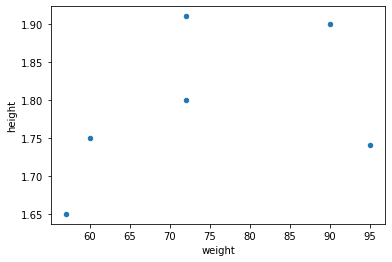

In [22]:
sp = df.plot.scatter('weight','height')

We can select individual columns by providing their name as a character string (i.e. surrounded by quotes) in square brackets. E.g. we can look at the third column named 'gender'.

In [31]:
df['gender']

0    f
1    m
2    f
3    m
4    m
5    f
Name: gender, dtype: object

 It looks like this one has only two different values, as we can verify by calling the function unique().

In [34]:
df['gender'].unique()

array(['f', 'm'], dtype=object)

For only two values, a scatter plot is less interesting. Alternatively, we can create a box plot, that visualises information about distribution of one column's values grouped by the values for 'gender'. 
The call to 'tight_layout()' in the example below is not strictly necessary, but makes the layout tidier).

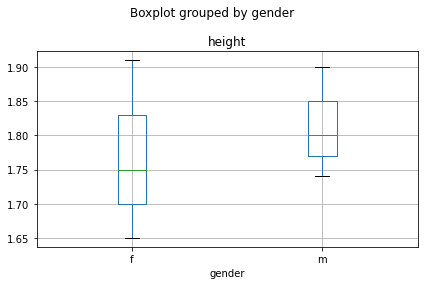

In [24]:
sp = df.boxplot(column='height',by='gender')
sp.get_figure().tight_layout()

We can get some information about a dataframe. The function 'describe()' gives us descriptive statistics for each column and 'head()' shows the first few rows in the dataframe.

In [36]:
df.describe()

,weight,height
count,6.000000,6.000000
mean,74.333333,1.791667
std,15.422927,0.100283
min,57.000000,1.650000
25%,63.000000,1.742500
50%,72.000000,1.775000
75%,85.500000,1.875000
max,95.000000,1.910000


In [37]:
df.head()

,gender,weight,height
0,f,60,1.75
1,m,72,1.80
2,f,57,1.65
3,m,90,1.90
4,m,95,1.74


In [45]:
df['bmi'] = df['weight'] / df['height']**2
df

,gender,weight,height,bmi
0,f,60,1.75,19.591837
1,m,72,1.80,22.222222
2,f,57,1.65,20.936639
3,m,90,1.90,24.930748
4,m,95,1.74,31.377989
5,f,72,1.91,19.736301


In [102]:
df2 = pd.read_csv('./../data/whiteside.csv')

In [104]:
df2['Temp'].mean()

4.875

In [49]:
g1 = (34, 49, 64, 38, 60, 78, 67, 36, 19, 37)
g2 = (77, 75, 78, 41, 51, 20, 61, 73, 76, 38)
print(np.mean(g1))
print(np.mean(g2))

48.2
59.0


In [51]:
g1a = (34, 49, 64, 38, 60, 78, 67, 36, 19, 37)
g2a = (34, 49, 64, 38, 60, 400, 67, 36, 19, 37)
print(np.mean(g1))
print(np.mean(g2))

48.2
59.0


In [54]:
print(np.median(g1a))
print(np.median(g2a))

43.5
43.5


In [56]:
np.sort(g1a)

array([19, 34, 36, 37, 38, 49, 60, 64, 67, 78])

In [58]:
np.var(g1,ddof=1)

340.4

In [59]:
np.var(g2,ddof=1)

420.0

In [62]:
print(np.std(g1,ddof=1))
print(np.std(g2,ddof=1))

18.4499322491981
20.493901531919196


In [68]:
print(np.std(g1,ddof=1)/np.mean(g1))
print(np.std(g2,ddof=1)/np.mean(g2))

0.38277867736925514
0.3473542632528677


In [71]:
g3 = np.tile(4,10)
print(g3)
np.var(g3)

[4 4 4 4 4 4 4 4 4 4]


0.0

In [72]:
(g1-np.mean(g1))/np.std(g1,ddof=1)

array([-0.76965052,  0.04336059,  0.85637171, -0.55284756,  0.63956874,
        1.61518208,  1.01897393, -0.66124904, -1.58266164, -0.6070483 ])

In [74]:
from scipy import stats
stats.zscore(g1,ddof=1)

array([-0.76965052,  0.04336059,  0.85637171, -0.55284756,  0.63956874,
        1.61518208,  1.01897393, -0.66124904, -1.58266164, -0.6070483 ])

In [75]:
stats.zscore(g2a,ddof=1)

array([-0.40946419, -0.2770943 , -0.14472441, -0.37416555, -0.18002305,
        2.82036111, -0.11825043, -0.39181487, -0.54183408, -0.38299021])

In [98]:
from scipy.stats.mstats import mquantiles
print(g1)
mquantiles(g1)

(34, 49, 64, 38, 60, 78, 67, 36, 19, 37)


array([35.9 , 43.5 , 64.15])

{'whiskers': [<matplotlib.lines.Line2D at 0x7fae922a7bd0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fae922ae490>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fae922a7850>],
 'medians': [<matplotlib.lines.Line2D at 0x7fae922aed50>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fae922b71d0>],
 'means': []}

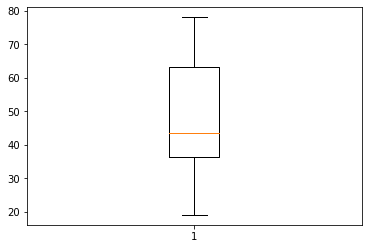

In [86]:
import matplotlib.pyplot as plt
plt.boxplot(g1)

In [96]:
print(stats.cov(df['height'],df['weight']))
print(stats.pearsonr(df['height'],df['weight']))

[[1.00566667e-02 6.77333333e-01]
 [6.77333333e-01 2.37866667e+02]]
(0.4379339635990291, 0.38509389043540027)
